# EDA and Data Cleaning-4

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [83]:
# Load the data 
data = pd.read_csv("winequality-white.csv",delimiter=";")

In [84]:
# Few data points
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [85]:
# Shape of the data 
data.shape

(4898, 12)

The shape of the data is (4898,12), which shows there are 4898 rows and 12 columns in the data.

In [86]:
# names of columns
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

It will give names all the features names presents in the data

In [87]:
# summary of the data 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The describe() function in the python summarizes statistics.
This function return the count,mean,standard deviation minimum and maximum values and the quantile of the data.

As we can see here, mean value is less than the median value of each column.
There is a large difference between the 75th% tile and max values of residual sugar, free sulfur dioxide & total sulfur dioxide.

In [88]:
# Checking the missing data 
data.isnull().any().any()

False

In [89]:
# other way to check the missing data for each columns
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

df.info return information about the data frame including the data types of each column and memory usage of the entire data.

In [90]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Data has only float and integer values

In [91]:
# Checks the number of the unique values in the each features
for col in data.columns.values:
    print("Number of the unique values are {}:{}".format(col,data[col].nunique()))

Number of the unique values are fixed acidity:68
Number of the unique values are volatile acidity:125
Number of the unique values are citric acid:87
Number of the unique values are residual sugar:310
Number of the unique values are chlorides:160
Number of the unique values are free sulfur dioxide:132
Number of the unique values are total sulfur dioxide:251
Number of the unique values are density:890
Number of the unique values are pH:103
Number of the unique values are sulphates:79
Number of the unique values are alcohol:103
Number of the unique values are quality:7


The feature that has a maximum unique value is density.
The feature that has a minimum unique value is quality.

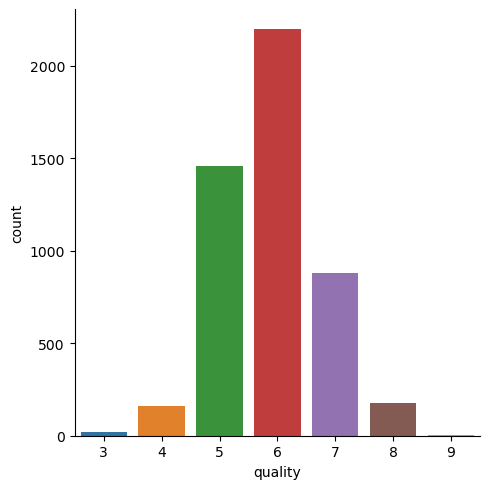

In [92]:
sns.catplot(data=data,x='quality',kind='count')

“quality” has a high number of values in categories 5, 6 and 7.

Only a few observations are there for the categories 3 & 9.

<AxesSubplot: >

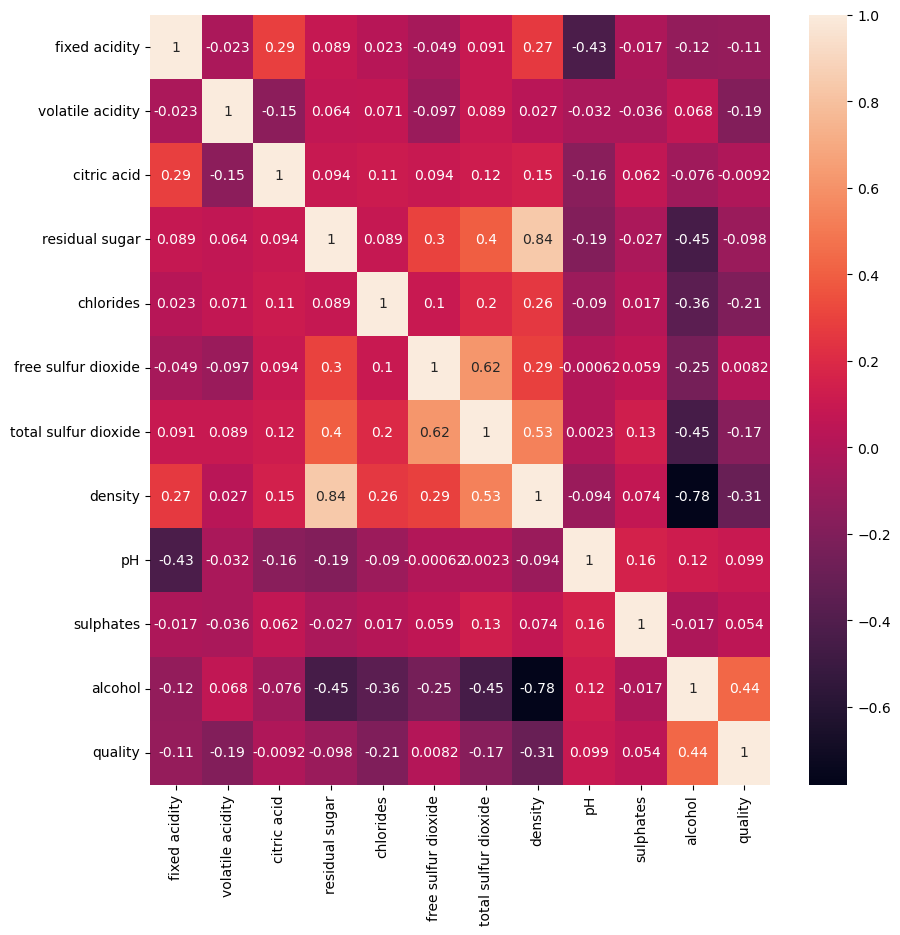

In [93]:
# We can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),color='k',annot=True)

density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.
pH & fixed acidity has negative correlation.
density & fixed acidity has positive correlation.
citric acid & fixed acidity has positive correlation.
citric acid & volatile acidity has negative correlation.
free sulphur dioxide & total sulphur dioxide has positive correlation.

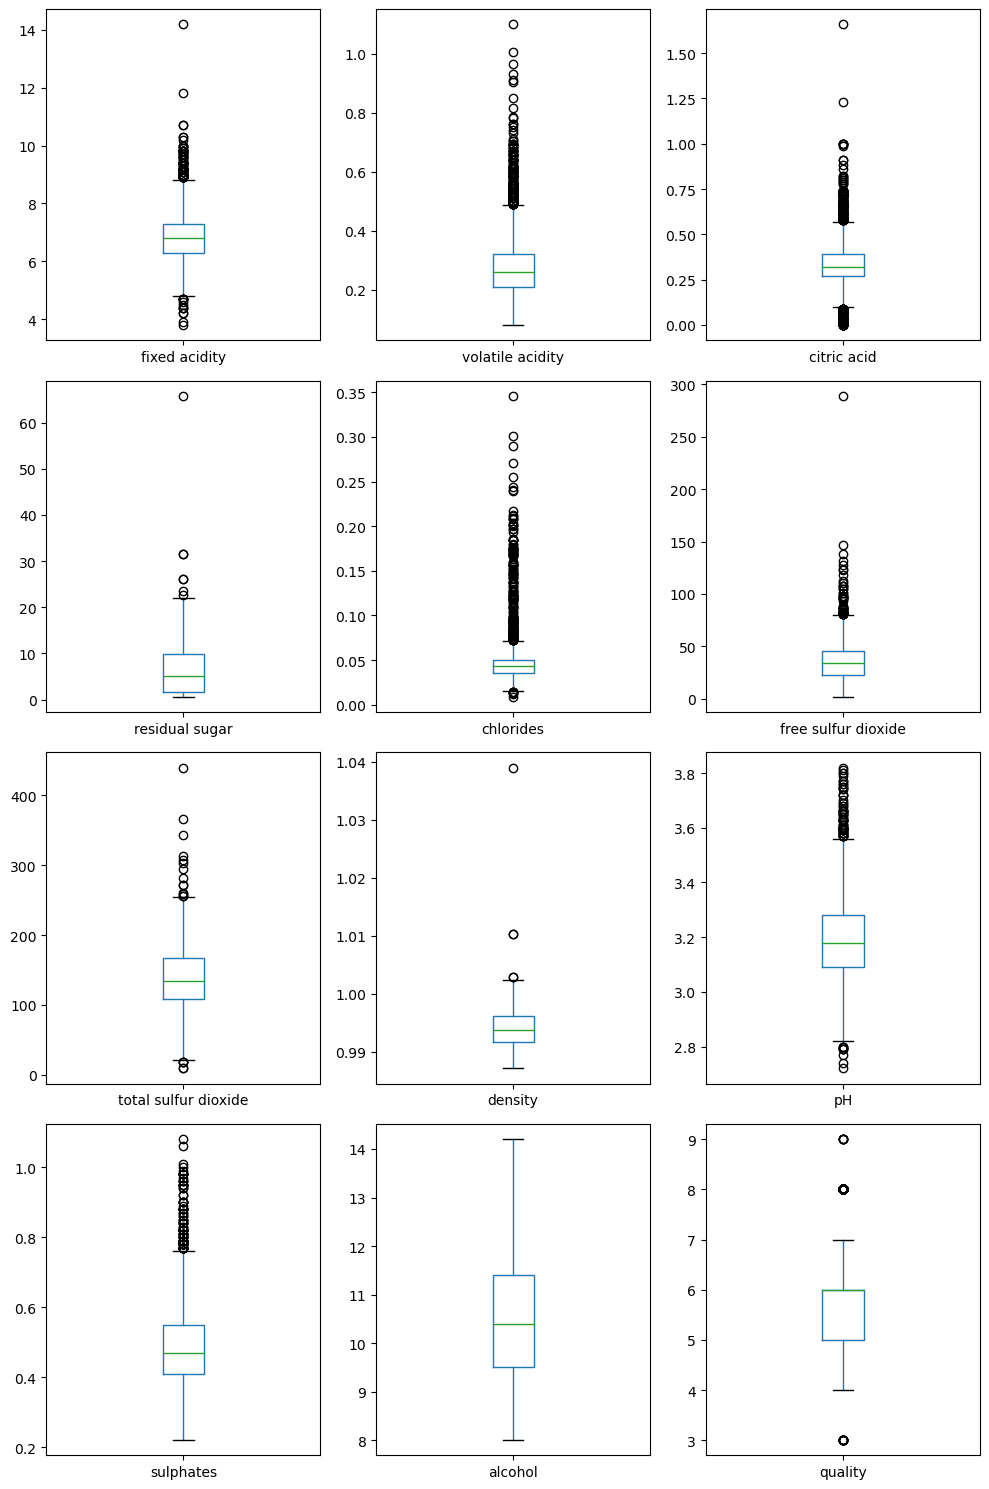

In [94]:
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    

Outliers are the points outside the 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.

Except for alcohol, all other features have outliers.

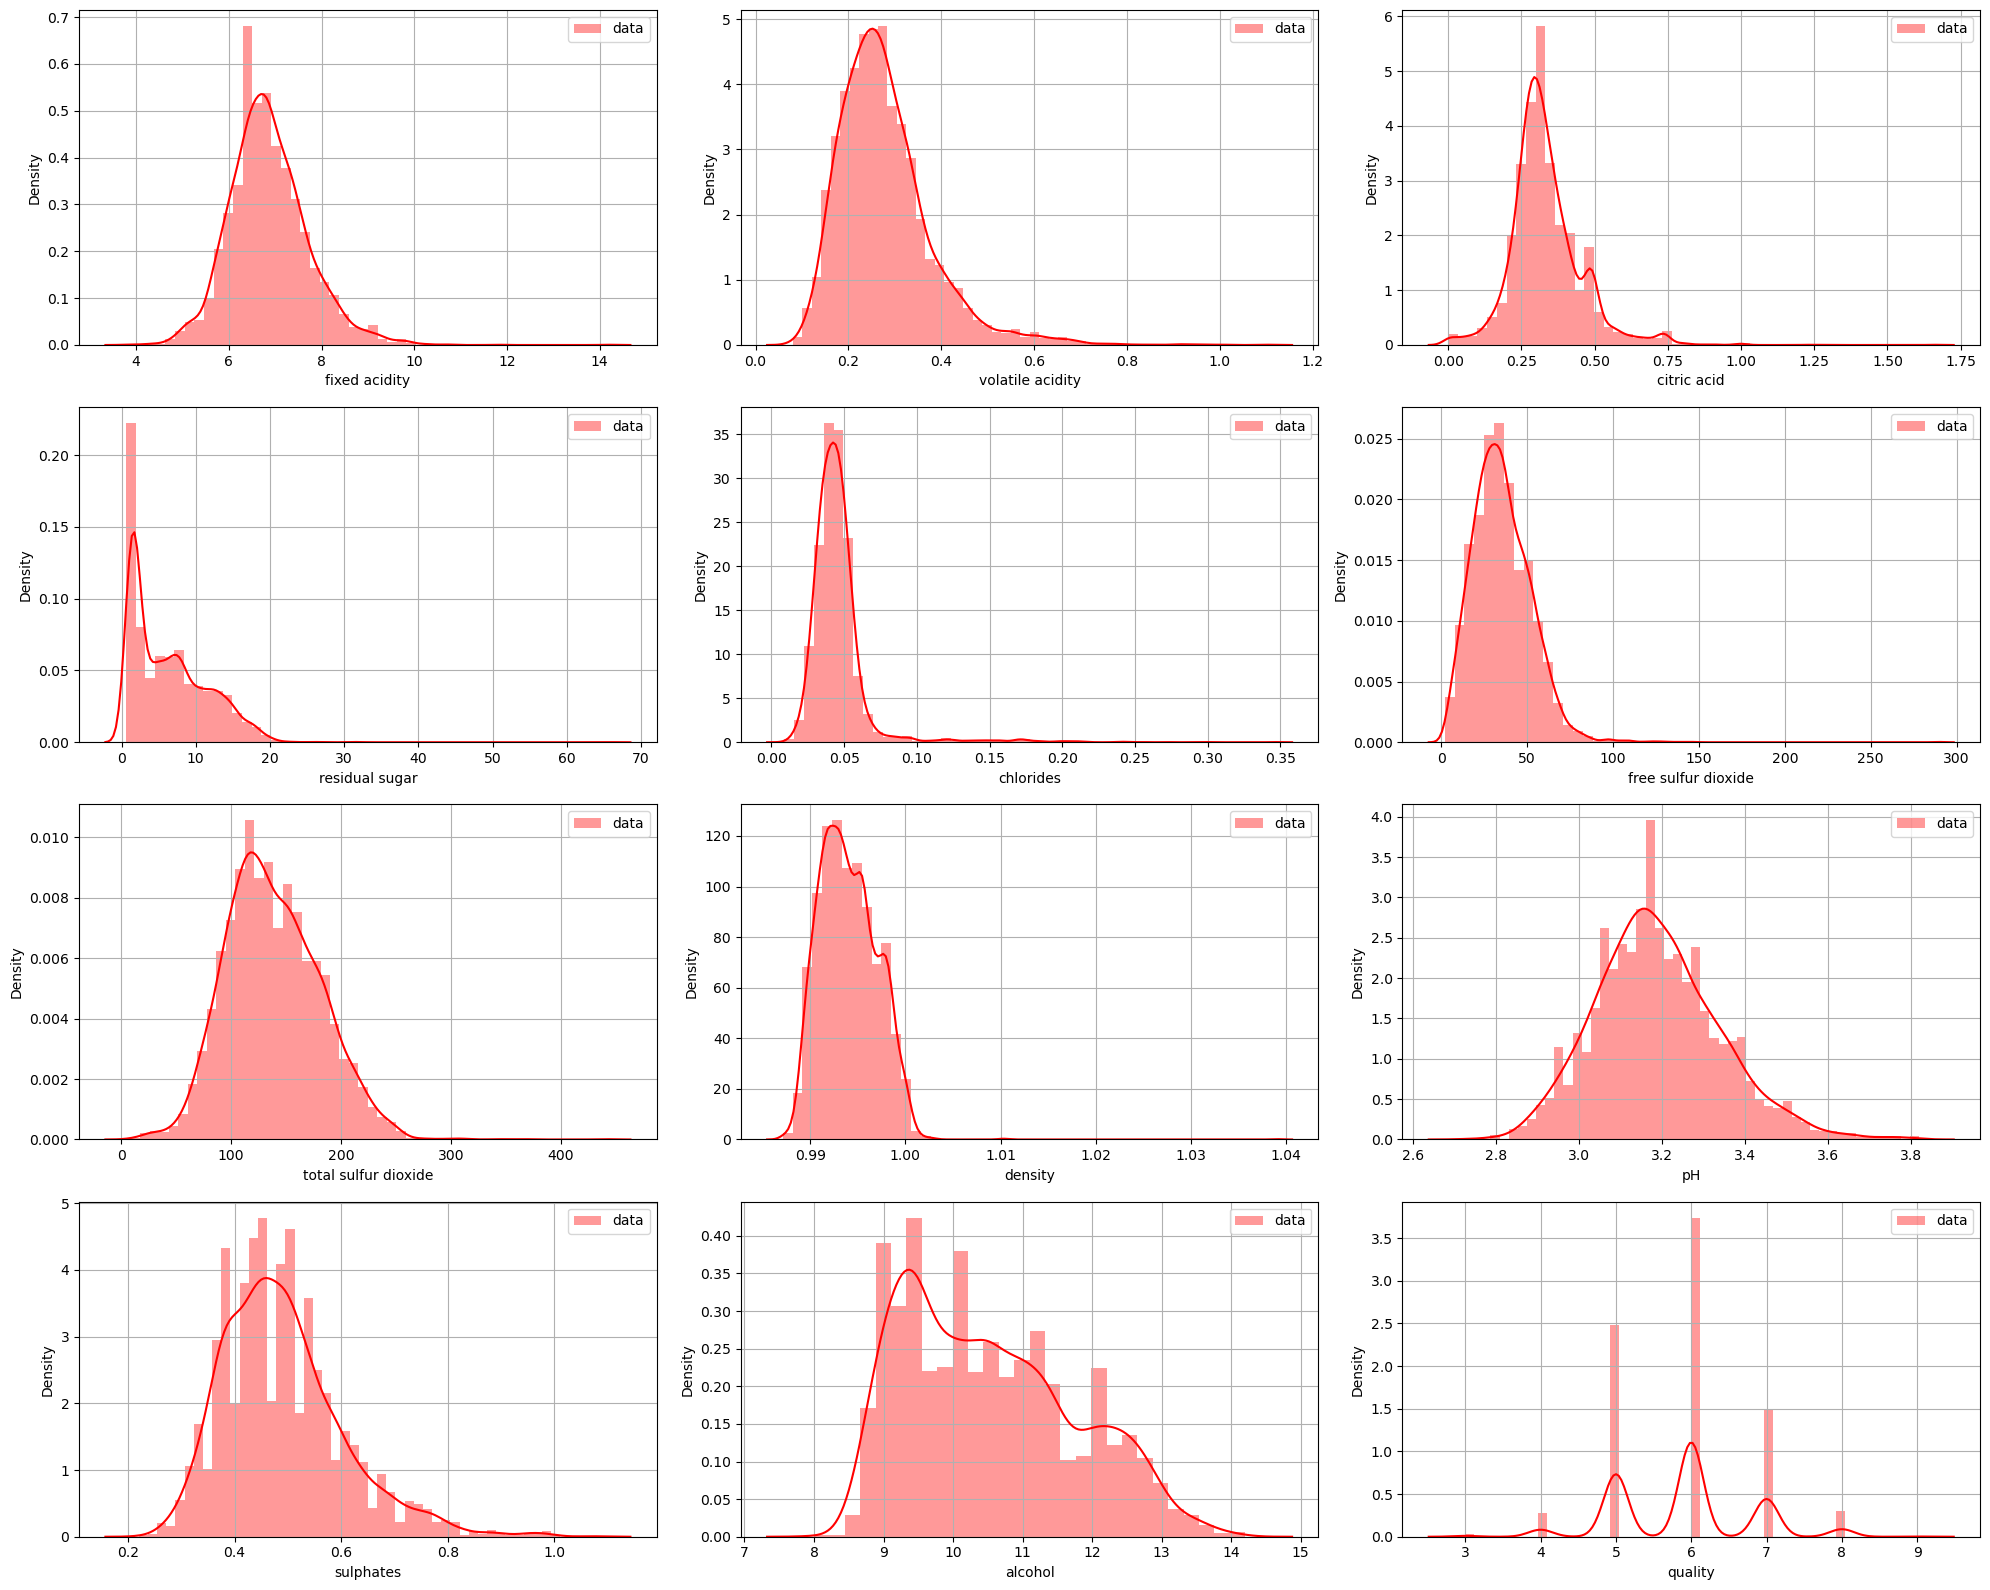

In [95]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(data[col],color='r', kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()


pH feature is approximately normally distributed.
Remaining all independent features are positively skewed.

In [97]:
# plot pairwise relationships in a data set.

In [ ]:
sns.pairplot(data=data,kind='scatter',diag_kind='kde')